### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

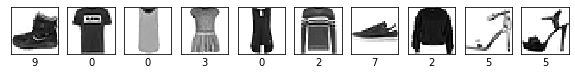

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(trainY[i].argmax())
    plt.imshow(trainX[i],cmap='binary')

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [9]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs
model.add(tf.keras.layers.Dense(10, activation='softmax')) 

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Execute the model using model.fit()

In [10]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 2008.5615 - acc: 0.7423 - val_loss: 1354.1341 - val_acc: 0.7970
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 1678.6036 - acc: 0.7745 - val_loss: 2122.3911 - val_acc: 0.7709
Epoch 3/10
60000/60000 [==============================] - 6s 99us/sample - loss: 1574.3996 - acc: 0.7853 - val_loss: 4034.6409 - val_acc: 0.7033
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1480.8395 - acc: 0.7916 - val_loss: 1575.4373 - val_acc: 0.7628
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 1513.1026 - acc: 0.7927 - val_loss: 1989.9570 - val_acc: 0.7881
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 1452.7689 - acc: 0.7961 - val_loss: 1705.7867 - val_acc: 0.7537
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model_1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_1.add(tf.keras.layers.BatchNormalization()) #Batch Normalization

#Add Dense Layer which provides 10 Outputs
model_1.add(tf.keras.layers.Dense(10, activation='softmax')) 

#Comile the model
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [12]:
model_1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.5995 - acc: 0.7924 - val_loss: 0.5331 - val_acc: 0.8184
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4929 - acc: 0.8295 - val_loss: 0.4947 - val_acc: 0.8307
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4682 - acc: 0.8387 - val_loss: 0.4799 - val_acc: 0.8349
Epoch 4/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4579 - acc: 0.8414 - val_loss: 0.4919 - val_acc: 0.8360
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4503 - acc: 0.8454 - val_loss: 0.4687 - val_acc: 0.8404
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4450 - acc: 0.8454 - val_loss: 0.4735 - val_acc: 0.8382
Epoch 7/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4396 - acc: 0.8477 - val_l

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model_1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
model_1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4180 - acc: 0.8543 - val_loss: 0.4630 - val_acc: 0.8418
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4142 - acc: 0.8576 - val_loss: 0.4617 - val_acc: 0.8421
Epoch 3/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4135 - acc: 0.8568 - val_loss: 0.4565 - val_acc: 0.8440
Epoch 4/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4173 - acc: 0.8543 - val_loss: 0.4613 - val_acc: 0.8437
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4160 - acc: 0.8562 - val_loss: 0.4544 - val_acc: 0.8434
Epoch 6/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4151 - acc: 0.8562 - val_loss: 0.4663 - val_acc: 0.8442
Epoch 7/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4144 - acc: 0.8555 - val_l

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model_2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model_2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model_2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model_2.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [21]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

### Run the model

In [23]:
model_2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.7268 - acc: 0.7612 - val_loss: 0.6934 - val_acc: 0.7706
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.6900 - acc: 0.7686 - val_loss: 0.6603 - val_acc: 0.7770
Epoch 3/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.6589 - acc: 0.7751 - val_loss: 0.6318 - val_acc: 0.7807
Epoch 4/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.6297 - acc: 0.7839 - val_loss: 0.6091 - val_acc: 0.7881
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.6074 - acc: 0.7882 - val_loss: 0.5898 - val_acc: 0.7914
Epoch 6/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.5899 - acc: 0.7929 - val_loss: 0.5742 - val_acc: 0.7965
Epoch 7/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.5738 - acc: 0.7966 - val_l